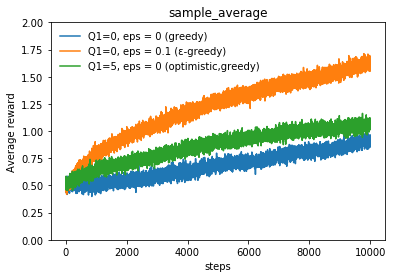

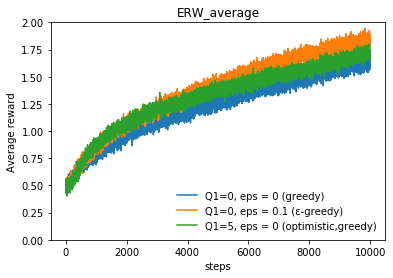

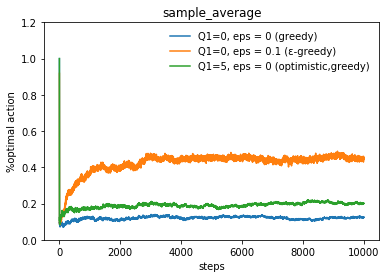

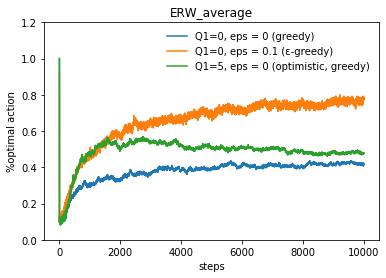

In [40]:
import numpy as np 
import matplotlib.pyplot as plt

class KBandits_nonstationary():
    def __init__(self,k = 10, timesteps = 10000, runs = 1000):
        self.k = k
        self.timesteps = timesteps
        self.runs = runs

# initialize the expected reward for each bandit with the same number 
    def init_q_star(self,q_star = 0.5):
        iq_star = np.empty(self.k)
        iq_star.fill(q_star)
        return iq_star
    
# initialize an array to store the number of times each bandit was taken   
    def init_num_bandit(self):
        n_bandit = np.empty(self.k)
        n_bandit.fill(0)
        return n_bandit

# update q_star of each bandit by adding a normally distributed increment with mean 0 and standard deviation 0.01 on each step
    def update_q_star(self, prev_q_star, mu = 0, sigma = 0.01):
        new_q_star = prev_q_star + np.random.normal(mu,sigma,prev_q_star.shape)
        return new_q_star
    
# initialize an array to store the initial value of estiamted reward for each bandit
    def init_Q(self, initial_Q):
        Q = np.empty(self.k)
        Q.fill(initial_Q)
        return Q

# algorithem 1: sample average + greedy
    def samp_aver_greedy(self):
        total_reward = np.zeros(self.timesteps)
        total_average_reward = np.zeros(self.timesteps)
        optimal_num = [0 for n in range(self.timesteps)]
        
        for r in range(self.runs):
            q_star = self.init_q_star()
            Q = self.init_Q(0)
            N = self.init_num_bandit()
            onerun_reward = []            
            
            for i in range(self.timesteps):        
                bandit = np.argmax(Q)
                reward = np.random.normal(q_star[bandit],1)
                optimal_bandit = np.argmax(q_star) 
                
                if optimal_bandit == bandit:
                    optimal_num[i] += 1
                else:
                    optimal_num[i] += 0
                    
        
                N[bandit] = N[bandit] + 1
                Q[bandit] = Q[bandit] + (1/N[bandit])*(reward - Q[bandit])  
                q_star = self.update_q_star(q_star, mu = 0, sigma = 0.01)
                
                onerun_reward.append(reward)
                #if i == 0:
                    #onerun_reward[i]=(i*onerun_reward[-1]+reward)/(i+1)
                    
                #else:
                    #onerun_reward.append((i*onerun_reward[-1]+reward)/(i+1))
            
            total_reward = total_reward + np.array(onerun_reward)
            
        total_average_reward = total_reward/self.runs
         
        return total_average_reward, np.array(optimal_num)/self.runs
    
# algorithem 2: sample average + epsilon_greedy
    def samp_aver_epsilon_greedy(self, epsilon):
        total_reward = np.zeros(self.timesteps)
        total_average_reward = np.zeros(self.timesteps)
        optimal_num = [0 for n in range(self.timesteps)]

        for r in range(self.runs):
            q_star = self.init_q_star()
            Q = self.init_Q(0)
            N = self.init_num_bandit()
            onerun_reward = []

            for i in range(self.timesteps):        
                randomE = np.random.random()
                if randomE <= epsilon:
                    bandit = np.random.choice(self.k)
                else:         
                    bandit = np.argmax(Q)
                reward = np.random.normal(q_star[bandit],1)
                optimal_bandit = np.argmax(q_star) 
                
                if optimal_bandit == bandit:
                    optimal_num[i] += 1
                else:
                    optimal_num[i] += 0
        
                N[bandit] = N[bandit] + 1
                Q[bandit] = Q[bandit] + (1/N[bandit])*(reward - Q[bandit])  
                q_star = self.update_q_star(q_star, mu = 0, sigma = 0.01)
                  
                onerun_reward.append(reward)
#                 if i == 0:
#                     onerun_reward[i]=(i*onerun_reward[-1]+reward)/(i+1)
#                 else:
#                     onerun_reward.append((i*onerun_reward[-1]+reward)/(i+1))
            
            total_reward = total_reward + np.array(onerun_reward)
            
        total_average_reward = total_reward/self.runs
            
        return total_average_reward, np.array(optimal_num)/self.runs
 
    # algorithem 3: sample average + optimistic initial value
    def samp_aver_optimistic_greedy(self):
        total_reward = np.zeros(self.timesteps)
        total_average_reward = np.zeros(self.timesteps)
        optimal_num = [0 for n in range(self.timesteps)]

        for r in range(self.runs):
            q_star = self.init_q_star()
            Q = self.init_Q(5)
            N = self.init_num_bandit()
            onerun_reward = []

            for i in range(self.timesteps):        
                bandit = np.argmax(Q)
                reward = np.random.normal(q_star[bandit],1)
                optimal_bandit = np.argmax(q_star)   
                
                if optimal_bandit == bandit:
                    optimal_num[i] += 1
                else:
                    optimal_num[i] += 0
        
                N[bandit] = N[bandit] + 1
                Q[bandit] = Q[bandit] + (1/N[bandit])*(reward - Q[bandit])  
                q_star = self.update_q_star(q_star, mu = 0, sigma = 0.01)
                
                onerun_reward.append(reward)
#                 if i == 0:
#                     onerun_reward[i]=(i*onerun_reward[-1]+reward)/(i+1)
#                 else:
#                     onerun_reward.append((i*onerun_reward[-1]+reward)/(i+1))
            
            total_reward = total_reward + np.array(onerun_reward)
            
        total_average_reward = total_reward/self.runs
            
        return total_average_reward, np.array(optimal_num)/self.runs
    
    # algorithem 4: expontial recency-weighted average + greedy
    def RW_aver_greedy(self,alpha):
        total_reward = np.zeros(self.timesteps)
        total_average_reward = np.zeros(self.timesteps)
        optimal_num = [0 for n in range(self.timesteps)]

        for r in range(self.runs):
            q_star = self.init_q_star()
            Q = self.init_Q(0)
            N = self.init_num_bandit()
            onerun_reward = []

            for i in range(self.timesteps):        
                bandit = np.argmax(Q)
                reward = np.random.normal(q_star[bandit],1)
                optimal_bandit = np.argmax(q_star)
                
                if optimal_bandit == bandit:
                    optimal_num[i] += 1
                else:
                    optimal_num[i] += 0
        
                N[bandit] = N[bandit] + 1
                Q[bandit] = Q[bandit] + alpha*(reward - Q[bandit])  
                q_star = self.update_q_star(q_star, mu = 0, sigma = 0.01)
                
                onerun_reward.append(reward)
                
#                 if i == 0:
#                     onerun_reward[i]=(i*onerun_reward[-1]+reward)/(i+1)
#                 else:
#                     onerun_reward.append((i*onerun_reward[-1]+reward)/(i+1))
            
            total_reward = total_reward + np.array(onerun_reward)
            
        total_average_reward = total_reward/self.runs
            
        return total_average_reward, np.array(optimal_num)/self.runs
    
    # algorithem 5: expontial recency-weighted average + epsilon_greedy
    def RW_aver_epsilon_greedy(self,epsilon,alpha):
        total_reward = np.zeros(self.timesteps)
        total_average_reward = np.zeros(self.timesteps)
        optimal_num = [0 for n in range(self.timesteps)]

        for r in range(self.runs):
            q_star = self.init_q_star()
            Q = self.init_Q(0)
            N = self.init_num_bandit()
            onerun_reward = []

            for i in range(self.timesteps):        
                randomE = np.random.random()
                if randomE <= epsilon:
                    bandit = np.random.choice(self.k)
                else:         
                    bandit = np.argmax(Q)
                reward = np.random.normal(q_star[bandit],1)
                optimal_bandit = np.argmax(q_star)   
                
                if optimal_bandit == bandit:
                    optimal_num[i] += 1
                else:
                    optimal_num[i] += 0
        
                N[bandit] = N[bandit] + 1
                Q[bandit] = Q[bandit] + alpha*(reward - Q[bandit])  
                q_star = self.update_q_star(q_star, mu = 0, sigma = 0.01)
                
                onerun_reward.append(reward)
#                 if i == 0:
#                     onerun_reward[i]=(i*onerun_reward[-1]+reward)/(i+1)
#                 else:
#                     onerun_reward.append((i*onerun_reward[-1]+reward)/(i+1))
            
            total_reward = total_reward + np.array(onerun_reward)
            
        total_average_reward = total_reward/self.runs
            
        return total_average_reward, np.array(optimal_num)/self.runs
    
    # algorithem 6: expontial recency-weighted average + optimistic initial value
    def RW_aver_optimistic_greedy(self,alpha):
        total_reward = np.zeros(self.timesteps)
        total_average_reward = np.zeros(self.timesteps)
        optimal_num = [0 for n in range(self.timesteps)]

        for r in range(self.runs):
            q_star = self.init_q_star()
            Q = self.init_Q(5)
            N = self.init_num_bandit()
            onerun_reward = []

            for i in range(self.timesteps):        
                bandit = np.argmax(Q)
                reward = np.random.normal(q_star[bandit],1)
                optimal_bandit = np.argmax(q_star) 
                
                if optimal_bandit == bandit:
                    optimal_num[i] += 1
                else:
                    optimal_num[i] += 0
        
                N[bandit] = N[bandit] + 1
                Q[bandit] = Q[bandit] + alpha*(reward - Q[bandit])  
                q_star = self.update_q_star(q_star, mu = 0, sigma = 0.01)
                
                onerun_reward.append(reward)
#                 if i == 0:
#                     onerun_reward[i]=(i*onerun_reward[-1]+reward)/(i+1)
#                 else:
#                     onerun_reward.append((i*onerun_reward[-1]+reward)/(i+1))
            
            total_reward = total_reward + np.array(onerun_reward)
            
        total_average_reward = total_reward/self.runs
            
        return total_average_reward, np.array(optimal_num)/self.runs
        
    
if __name__ == "__main__":
    
    # some default parameters that can be tweaked
    epsilon = 0.1
    alpha = 0.1 # setting alpha = 1/n results in the sample averages algorithm
    kbandit = KBandits_nonstationary() 
 
    KK = kbandit.samp_aver_greedy()[0]
    TT = kbandit.samp_aver_epsilon_greedy(epsilon)[0]
    LL = kbandit.samp_aver_optimistic_greedy()[0]
    
    HH = kbandit.samp_aver_greedy()[1]
    II = kbandit.samp_aver_epsilon_greedy(epsilon)[1]
    PP = kbandit.samp_aver_optimistic_greedy()[1]
    
    AA = kbandit.RW_aver_greedy(alpha)[0]
    BB = kbandit.RW_aver_epsilon_greedy(epsilon,alpha)[0]  
    CC = kbandit.RW_aver_optimistic_greedy(alpha)[0]
    
    EE = kbandit.RW_aver_greedy(alpha)[1]
    FF = kbandit.RW_aver_epsilon_greedy(epsilon,alpha)[1] 
    GG = kbandit.RW_aver_optimistic_greedy(alpha)[1]
    
    plt.figure()
    plt.plot(KK,label = "Q1=0, eps = 0 (greedy)")
    plt.plot(TT,label = "Q1=0, eps = 0.1 (ε-greedy)")
    plt.plot(LL,label = "Q1=5, eps = 0 (optimistic,greedy)")
    plt.ylim(0,2)
    plt.xlabel('steps')
    plt.ylabel('Average reward')
    plt.title('sample_average')
    plt.legend(loc='best',frameon=False)

    plt.figure()
    plt.plot(AA,label = "Q1=0, eps = 0 (greedy)")
    plt.plot(BB,label = "Q1=0, eps = 0.1 (ε-greedy)")
    plt.plot(CC,label = "Q1=5, eps = 0 (optimistic,greedy)")
    plt.ylim(0,2)
    plt.xlabel('steps')
    plt.ylabel('Average reward')
    plt.title('ERW_average')
    plt.legend(loc='best',frameon=False)
   
    
    plt.figure()
    plt.plot(HH,label = "Q1=0, eps = 0 (greedy)")
    plt.plot(II,label = "Q1=0, eps = 0.1 (ε-greedy)")
    plt.plot(PP,label = "Q1=5, eps = 0 (optimistic,greedy)")
    plt.ylim(0,1.2)
    plt.xlabel('steps')
    plt.ylabel('%optimal action')
    plt.title('sample_average')
    plt.legend(loc='best',frameon=False)
    
    plt.figure()
    plt.plot(EE,label = "Q1=0, eps = 0 (greedy)")
    plt.plot(FF,label = "Q1=0, eps = 0.1 (ε-greedy)")
    plt.plot(GG,label = "Q1=5, eps = 0 (optimistic, greedy)")
    plt.ylim(0,1.2)
    plt.xlabel('steps')
    plt.ylabel('%optimal action')
    plt.title('ERW_average')
    plt.legend(loc='best',frameon=False)
    
    plt.show()